In [1]:
import numpy as np
import pandas as pd

from helpers.data_preparation import * 
from helpers.nlp_functions import *
from helpers.time_series_functions import *

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [21]:
# "https://www.isyatirim.com.tr/en-us/analysis/stocks/Pages/bist-data-table.aspx?endeks=01#page-1"
stock_list = stockListFromURL("https://www.isyatirim.com.tr/en-us/analysis/stocks/Pages/bist-data-table.aspx?endeks=01#page-1")
# stock_list = stockListFromURL()

In [23]:
stock_data = stockDataFromYf(stock_list)

[*********************100%%**********************]  100 of 100 completed


In [13]:
# stock_list = filterStocksByVolume(stock_data, largest_n=200)

In [30]:
# price_data = stock_data["Close"]

In [24]:
price_data = stock_data["Close"][stock_list]

In [26]:
threshold = 0.3 * len(price_data)

price_data = price_data.dropna(thresh=len(price_data) - threshold, axis=1)
price_data = price_data.fillna(method='ffill')
price_data = price_data.fillna(method='bfill')

stock_list = list(price_data.columns)
stock2id = stocks2id(stock_list)
stock_data = stockDataFromYf(stock_list)

C:\Users\ardaa\AppData\Local\Temp\ipykernel_9480\4196012245.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  price_data = price_data.fillna(method='ffill')
C:\Users\ardaa\AppData\Local\Temp\ipykernel_9480\4196012245.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  price_data = price_data.fillna(method='bfill')
[*********************100%%**********************]  82 of 82 completed


In [28]:
textual_data = fetchTextualInformation(stock_list, stock2id)

100%|██████████| 82/82 [00:21<00:00,  3.77it/s]


In [29]:
pd.DataFrame(textual_data).T

,ticker_id,code,name,sector,industry,description
AEFES.IS,0,AEFES.IS,ANADOLU EFES,Consumer Defensive,Beverages - Brewers,Anadolu Efes Biracilik ve Malt Sanayii Anonim ...
AKBNK.IS,1,AKBNK.IS,AKBANK,Financial Services,Banks - Regional,"Akbank T.A.S., together with its subsidiaries,..."
AKCNS.IS,2,AKCNS.IS,AKCANSA,Basic Materials,Building Materials,Akçansa Çimento Sanayi ve Ticaret Anonim Sirke...
AKFGY.IS,3,AKFGY.IS,AKFEN GMYO,Real Estate,REIT - Hotel & Motel,Akfen Real Estate Investment Trust Inc. was es...
AKSA.IS,4,AKSA.IS,AKSA,Consumer Cyclical,Textile Manufacturing,"Aksa Akrilik Kimya Sanayii A.S., together with..."
...,...,...,...,...,...,...
VESBE.IS,77,VESBE.IS,VESTEL BEYAZ ESYA,Consumer Cyclical,"Furnishings, Fixtures & Appliances",Vestel Beyaz Esya Sanayi ve Ticaret A.S. engag...
VESTL.IS,78,VESTL.IS,VESTEL,Technology,Consumer Electronics,Vestel Elektronik Sanayi ve Ticaret Anonim Sir...
YEOTK.IS,79,YEOTK.IS,YEO TEKNOLOJI ENERJI,Industrials,Engineering & Construction,Yeo Teknoloji Enerji Ve Endustri Anonim Sirket...
YKBNK.IS,80,YKBNK.IS,YAPI VE KREDI BANK.,Financial Services,Banks - Regional,"Yapi ve Kredi Bankasi A.S., together with its ..."


In [94]:
tokenizer, nlp_model = load_model()

In [95]:
description_feature_vectors = {}

for i, key in enumerate(list(textual_data.keys())):
    desc = textual_data[key]["description"]
    feature_vector = extract_features(text=desc, tokenizer=tokenizer, model=nlp_model)
    description_feature_vectors[i] = feature_vector

In [85]:
'''
with open(f'../cold_data/description_feature_vectorsbist100.pkl', 'wb') as f:
    pickle.dump(description_feature_vectors, f)
'''

In [30]:
title = "bist100"
ts_sim = calculate_historical_ts_similarities(price_data, start_date="2023-01-01", end_date="2023-06-01", 
                                              similarity_metric="pearson", path=f"range_similarities_{title}.pkl")

Date Range Count: 6


100%|██████████| 82/82 [00:07<00:00, 10.87it/s]


In [31]:
'''
with open(f'../calculated_data/historical_ts_sim_bist100_pearson.pkl', 'wb') as f:
    pickle.dump(ts_sim, f)
'''

In [98]:
# price_data["Date"] = stock_data.index
# price_data.to_csv(f"../cold_data/stock_databist100.csv", index=False)
# pd.DataFrame(textual_data).to_csv(f"../cold_data/textual_information{title}.csv", index=False)

# s = pd.DataFrame(columns=list(stock2id.keys()))
# s.loc[0] = (list(stock2id.values()))
# s.to_csv(f"../cold_data/stock2id{title}.csv", index=False)

In [32]:
with open("../calculated_data/historical_ts_sim_bist100_distCorr.pkl", 'rb') as file:
    ts_sim_dist_corr = pickle.load(file)
with open("../calculated_data/historical_ts_sim_bist100_dtw.pkl", 'rb') as file:
    ts_sim_dist_dtw = pickle.load(file)
with open("../calculated_data/historical_ts_sim_bist100_euclidean.pkl", 'rb') as file:
    ts_sim_dist_euclidean = pickle.load(file)
with open("../calculated_data/historical_ts_sim_bist100_pearson.pkl", 'rb') as file:
    ts_sim_dist_pearson = pickle.load(file)

In [33]:
from data_preparer import DataPreparer
preparer = DataPreparer(
    data_path=f"../cold_data/description_feature_vectorsbist100.pkl",
    textual_path=f"../cold_data/textual_informationbist100.csv",
    stock2idPath=f"../cold_data/stock2idbist100.csv",
    stockDataPath=f"../cold_data/stock_databist100.csv"
    )

In [37]:
preparer.ts_similarities = ts_sim_dist_pearson
preparer.prepare_snapshots(weight_combination={"ts":0.55, "tx":0.45}) # 55, 45

preparer.calculate_similarity_matrix(node_count=len(preparer.stockData.columns), snapshot_start_id=0, snapshot_end_id=5)
preparer.calculate_final_communes()
node_metrics = preparer.calculate_node_metrics()

a, b = np.median(node_metrics.pagerank.dropna()) - np.std(node_metrics.pagerank.dropna())*0.5, np.median(node_metrics.centrality.dropna())

investment_universe = list(node_metrics.reset_index()[(node_metrics.pagerank > a) 
                                                      & (node_metrics.centrality < b)].sort_values(by="centrality", ascending=True)["index"])
print(len(investment_universe))

selected_stocks = []
for selected_id in investment_universe:
    selected_stocks.append(preparer.id2stock(selected_id))
    
from allocator import Allocator

allocator = Allocator()
start_date = "2023-05-26"

filtered_optim = allocator.mean_variance_optimization(preparer.stockData[(preparer.stockData.index < start_date) & (preparer.stockData.index > "2023-01-01")][selected_stocks], 
                                                           min_weight=0.01, take_pct_change=True) 
filtered_return = allocator.calculate_cumulative_return(filtered_optim[filtered_optim.weights > 0], stockData=preparer.stockData, startDate=start_date)
print(filtered_return[0])

21
1.14728541931171


In [11]:
mean_variance_optim = allocator.mean_variance_optimization(preparer.stockData[(preparer.stockData.index < start_date)&(preparer.stockData.index >"2023-01-01")], 
                                                           min_weight=0.01, take_pct_change=True) 
mean_variance_return = allocator.calculate_cumulative_return(mean_variance_optim[mean_variance_optim.weights > 0], stockData=preparer.stockData, startDate=start_date)
mean_variance_return[0]

1.0068389962518025

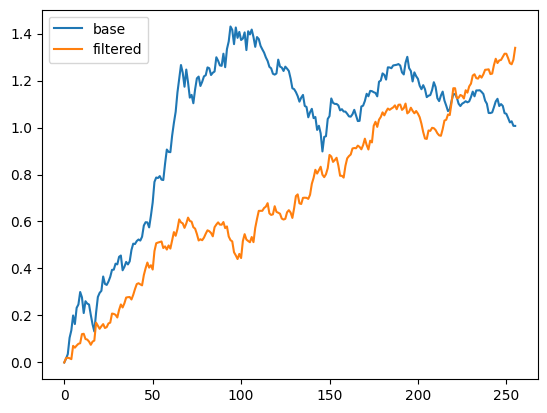

In [8]:
import matplotlib.pyplot as plt

plt.plot(mean_variance_return[-1], label="base")
plt.plot(filtered_return[-1], label="filtered")

plt.legend()